## SVM model using HOG, LBP and Raw pixels 

This notebook does the following:
1. Import all the packages
2. Import the data - The dataset is contained in the folder dataset. In the folder, every subfolder name is the name of label and the subfolder contains the images of that label.
3. Split the data into training and testing data
4. convert the images into HOG features, LBP features and raw pixel features. This is done using a python file created which contains functions to reduce code.
5. Train and Test the SVM model using the HOG features
6. Train and Test the SVM model using the LBP features
7. Train and Test the SVM model using the raw pixel features
8. Compare the accuracy of the three models

### 1. Importing all the necessary python packages

All the neccessary python packages are imported.

In [105]:
import image_preprocessing as ip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import image_preprocessing as ip

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing the dataset and Image Preprocessing 

To Import the dataset the function load_dataset() was used from image_preprocessing.py file.


**load_dataset(dataset_folder_path)**

    This function loads the dataset from the folder specified by dataset_folder_path. The folder should contain subfolders, and each subfolder name should represent a label. The function then loads all images from each label's corresponding subfolder and returns two lists: one list containing the loaded images, and the other containing their respective labels.

Parameters

    dataset_folder_path (str): the path to the folder containing the dataset. The folder should contain subfolders, where each subfolder name represents a label.

Returns

    data (list): A list containing all loaded images.
    labels (list): A list containing the corresponding labels of each image in the data list.







<BR>
<BR>

Similarly, To clean the dataset preprocess_data() function was used from imagge_preprocessing.py file. 

**preprocess_data(data, normalise = False)**

    This function takes a list of images and converts them into grayscale using the OpenCV library. After that, it applies a threshold on the images to binarize them. If the normalise flag is set to True, the function normalizes the images by dividing all the pixel values by 255. Finally, the function returns a list of binarized images.

Parameters

    data(list): list of images
    normalise(Boolean): a boolean flag (default False) that indicates whether to normalize the images.


Returns

    binary_images(list) : A list of binarized and optionally normalized images.



In [106]:
# The path to the dataset

dataset_path = ".//dataset//"

In [107]:
data, labels = ip.load_dataset(dataset_path)

data = ip.preprocess_data(data)


Number of Images:  5000


#### 2.1 Visualising Images

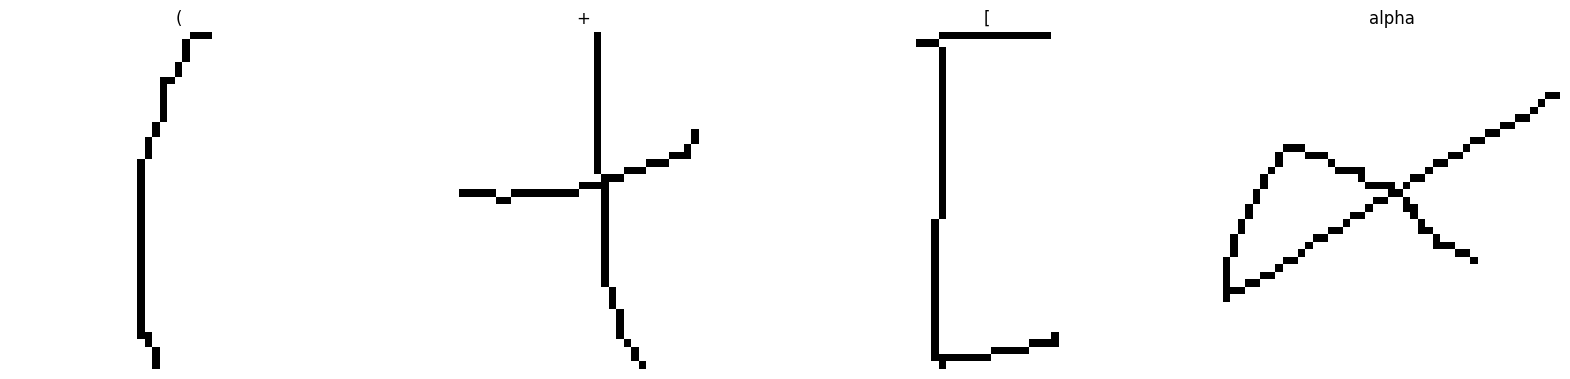

In [108]:
# Visualize the data at index 0, 500, 1000, 2000

idx = [0, 500, 1000, 2000]

plt.figure(figsize=(20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(data[idx[i]], cmap="gray")
    plt.title(labels[idx[i]])
    plt.axis("off")
plt.show()



## 3. Spliting the data into train and test

This code extracts image data and labels and splits them into training and testing sets using an 80/20 split, where 80% of the data is used for training and 20% is used for testing. This helps to evaluate the performance of the machine learning model and ensure that it can generalize well to new, unseen data.

In [109]:
# train test split
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.20, random_state=42)

## 4. Converting Images to HOG Features, LBP features and 1-D array

To convert images into desired formats three different functions were used from image_preprocessing.py

These three functions are 

**convert_to_HOG(data, orientations=9, pixels_per_cell=(5, 5), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")**

    This function converts images into HOG (Histogram of Oriented Gradients) features using the hog function from the scikit-image library. It takes a list of images as input and returns a list of HOG features for each image.

    Parameters

        - data : A list of images to be converted into HOG features.
        - orientations : The number of orientation bins to use in the HOG feature descriptor. Default is 9.
        - pixels_per_cell : The size (in pixels) of a cell. It determines the granularity of the HOG feature. Default is (5,5).
        - cells_per_block : The number of cells in each block. Default is (2,2).
        - transform_sqrt : A boolean parameter that indicates whether or not the square-root of each pixel intensity should be computed before calculating the HOG feature.Default is True.
        - block_norm : The type of block normalization to apply. Default is "L2-Hys".

    Returns

        hog_images (list): A list of HOG features for each image in the input data




<BR>
<BR>


**convert_to_LBP(data, numPoints = 24, radius = 8, eps=1e-7)**

    This function converts a set of images into Local Binary Pattern (LBP) features. It applies the LBP algorithm to extract texture information from each image and then normalizes the LBP histogram of each image.

    Parameters

        - data: A list of images to be converted to LBP features.
        - numPoints: An integer, the number of points used to build the circular LBP pattern. It defaults to 24.
        - radius: An integer, the radius of the circular LBP pattern. It defaults to 8.
        - eps: A small float value to prevent division by zero. It defaults to 1e-7.

    Returns

        lbp_images (list): A list of LBP feature histograms, one for each input image.



<BR>
<BR>


**convert_2d_to_1d(data)**

    This function takes a 2D array (list of lists) as input and returns a 1D array (list). The function first initializes an empty list data_1d. It then iterates over each element img in the input 2D array data. For each img, the ravel() method is applied to flatten the image into a 1D array img_1d. The img_1d is then appended to the data_1d list. Finally, the function returns the data_1d list containing all the 1D arrays.

    Parameters

        - data: A list of images to be converted to 1D array.

    Returns

        data_1d (list): 1-D array 


In [110]:
# convert the images into HOG features
trainHOG = ip.convert_to_HOG(trainData)
testHOG = ip.convert_to_HOG(testData)

In [111]:
# convert the images into LBP features
trainLBP = ip.convert_to_LBP(trainData, 24, 8)
testLBP = ip.convert_to_LBP(testData, 24, 8)

In [112]:

# convert tje images into 1d arrat
trainRAW = ip.convert_2d_to_1d(trainData)
testRAW = ip.convert_2d_to_1d(testData)

In [113]:
# Print the shape of the HOG, LBP and RAW features

print("HOG Features: ", np.array(trainHOG).shape)
print("LBP Features: ", np.array(trainLBP).shape)
print("RAW Features: ", np.array(trainRAW).shape)

HOG Features:  (4000, 2304)
LBP Features:  (4000, 26)
RAW Features:  (4000, 2025)


## 5. SVM Model using HOG Features

In [114]:
# Train the SVM model using the HOG features

# encode the labels
le = LabelEncoder()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)

# train the model
hog_model = SVC()
hog_model.fit(trainHOG, trainLabels)

# evaluate the model
hog_predictions = hog_model.predict(testHOG)
print(classification_report(testLabels, hog_predictions, target_names=le.classes_))

              precision    recall  f1-score   support

           (       0.97      0.99      0.98       111
           +       0.97      0.99      0.98       105
           [       1.00      0.97      0.99       105
           ]       0.99      1.00      0.99        85
       alpha       0.99      0.97      0.98        94
        beta       1.00      0.99      0.99        98
         geq       1.00      1.00      1.00        98
         neq       0.99      1.00      1.00       112
         sum       1.00      1.00      1.00        81
       times       1.00      1.00      1.00       111

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



## 6. SVM Model Using LBP

In [115]:
# Train the SVM model using the LBP features

# train the model
lbp_model = SVC( kernel='rbf', C=1000)

lbp_model.fit(trainLBP, trainLabels)

# evaluate the model
lbp_predictions = lbp_model.predict(testLBP)
print(classification_report(testLabels, lbp_predictions, target_names=le.classes_))

              precision    recall  f1-score   support

           (       0.95      0.97      0.96       111
           +       0.92      0.99      0.95       105
           [       0.78      0.62      0.69       105
           ]       0.62      0.76      0.69        85
       alpha       0.69      0.73      0.71        94
        beta       0.92      0.83      0.87        98
         geq       0.76      0.84      0.80        98
         neq       0.93      0.84      0.88       112
         sum       0.87      0.83      0.85        81
       times       0.95      0.95      0.95       111

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000



## 7. SVM model using Raw pixels

In [116]:
# train the model
raw_model = SVC()
raw_model.fit(trainRAW, trainLabels)

# evaluate the model
raw_predictions = raw_model.predict(testRAW)
print(classification_report(testLabels, raw_predictions, target_names=le.classes_))

              precision    recall  f1-score   support

           (       0.99      0.99      0.99       111
           +       0.94      0.98      0.96       105
           [       0.99      0.99      0.99       105
           ]       1.00      1.00      1.00        85
       alpha       0.97      0.98      0.97        94
        beta       0.99      0.96      0.97        98
         geq       0.98      0.97      0.97        98
         neq       0.99      1.00      1.00       112
         sum       0.94      0.96      0.95        81
       times       0.98      0.95      0.96       111

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



## 8. Comparing Accuracy Results

In [117]:
accuracy_results = pd.DataFrame({'SVM' : [accuracy_score(testLabels, hog_predictions), accuracy_score(testLabels, lbp_predictions), accuracy_score(testLabels, raw_predictions)]}).set_index([['HOG', 'LBP', 'RAW']])
accuracy_results

,SVM
HOG,0.991
LBP,0.841
RAW,0.978


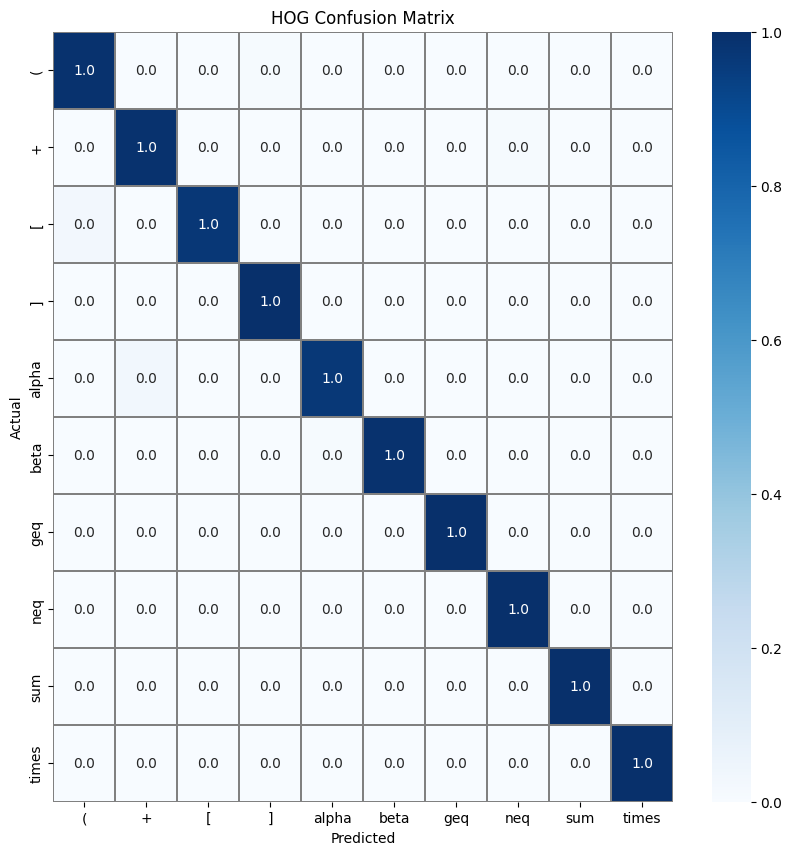

In [118]:
# Confusion Matrix for all HOG model with label names on the axes



cm = confusion_matrix(testLabels, hog_predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("HOG Confusion Matrix")
plt.show()



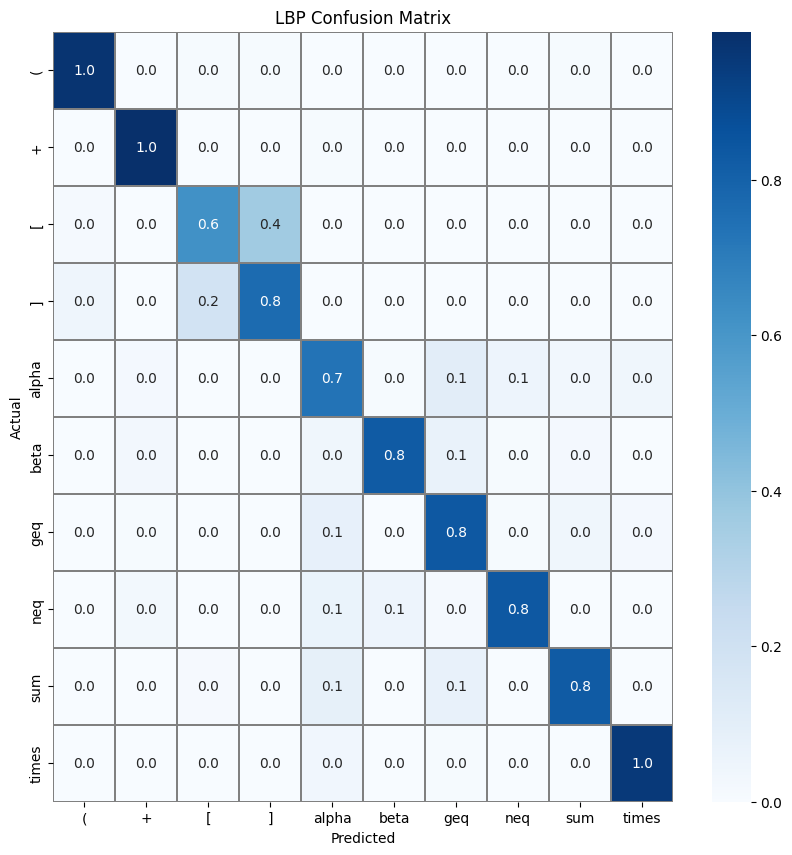

In [119]:
# Confusion Matrix  for LBP model with label names on the axes

cm = confusion_matrix(testLabels, lbp_predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("LBP Confusion Matrix")
plt.show()




Text(0.5, 1.0, 'RAW Confusion Matrix')

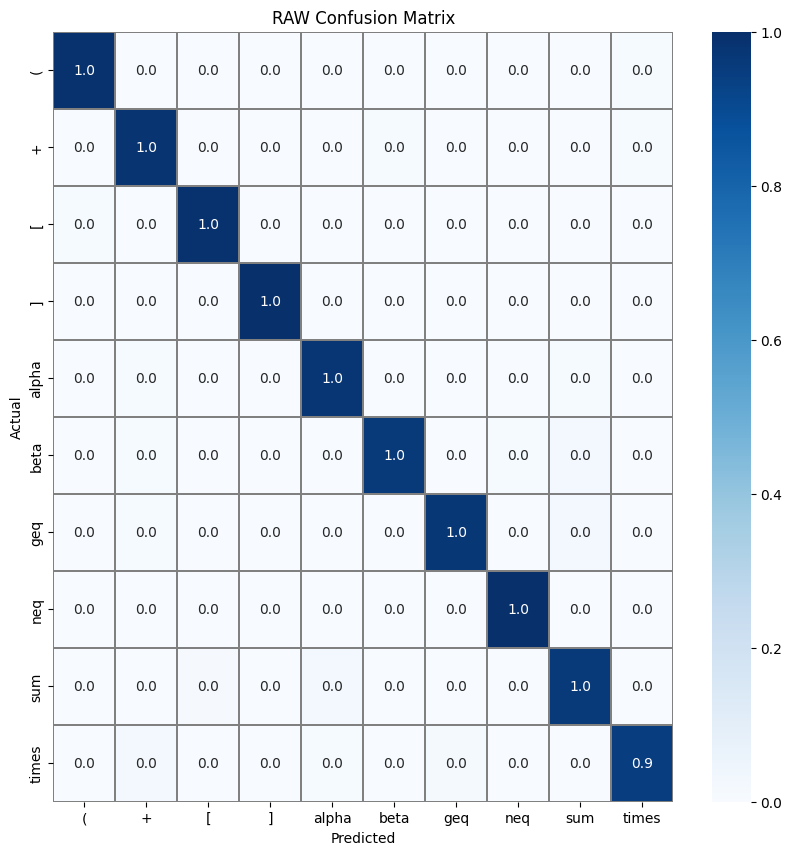

In [120]:
# confusion matrix for RAW model with label names on the axes

cm = confusion_matrix(testLabels, raw_predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("RAW Confusion Matrix")


In [121]:
# What are the parameters of the SVM model in a dataframe. Where the first row contains HOG, second LBP and third RAW

# HOG
pd.DataFrame({'HOG': hog_model.get_params(),
              'LBP': lbp_model.get_params(),
              'RAW': raw_model.get_params()})


,HOG,LBP,RAW
C,1.0,1000,1.0
break_ties,False,False,False
cache_size,200,200,200
class_weight,None,None,None
coef0,0.0,0.0,0.0
decision_function_shape,ovr,ovr,ovr
degree,3,3,3
gamma,scale,scale,scale
kernel,rbf,rbf,rbf
max_iter,-1,-1,-1
